# Regional temperature distribution

In [1]:
import sys
import os
aps_path = os.path.dirname(os.path.abspath("."))
sys.path.append(aps_path)
print(aps_path)

C:\Users\kmu\GitHub\APS\aps


In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from aps_io.get_arome import nc_info, nc_load

In [3]:
%matplotlib inline

Read temperature data from netcdf file and clip to a subregion.

In [4]:
jd, altitude, land_area_fraction, nc_vars = nc_load("../data/t2myr_kf0_5km_20161027_00.nc",
                                                    ['air_temperature_2m'], None, [6, 30])
#[59.0, 60.0, 8.5, 9.0]

### DIMENSIONS ###
OrderedDict([('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 67
), ('rlon', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlon', size = 1060
), ('rlat', <class 'netCDF4._netCDF4.Dimension'>: name = 'rlat', size = 3680
)])
-	time
-	rlon
-	rlat
### VARIABLES ###
-	time
-	forecast_reference_time
-	projection_3
-	rlon
-	rlat
-	longitude
-	latitude
-	altitude
-	air_temperature_2m
Variables 'x' and 'y' are not provided.
Variable 'land_area_fraction' is not provided.


In [11]:
# create elevation masks
above1000 = np.ma.masked_less_equal(altitude, 1000.0).mask # returns the  inverse
below1000 = np.ma.masked_greater_equal(altitude, 1000.0).mask
print(altitude, below500, above1000)
print(nc_vars)

[[  1.           1.           1.         ...,  34.20000076  50.90000153
   37.60000229]
 [  1.           1.           1.         ...,  29.60000038  34.70000076
   22.10000038]
 [  1.           1.           1.         ...,  20.10000038  19.89999962
   28.10000038]
 ..., 
 [  1.           1.           1.         ...,   1.           1.           1.        ]
 [  1.           1.           1.         ...,   1.           1.           1.        ]
 [  1.           1.           1.         ...,   1.           1.           1.        ]] [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]] [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  

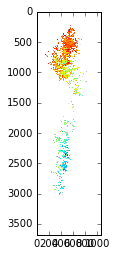

In [14]:
temp = np.ma.masked_array(nc_vars['air_temperature_2m'][0, :, :], above1000)
plt.imshow(temp, aspect='equal')
plt.show()

In [23]:
flier_low = np.nanpercentile(temp, 5.0))
flier_high = np.nanpercentile(temp, 95.0))
center = np.nanmean(temp) # should be median

268.672271729
284.268463135
271.914


In [ ]:
box_data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(box_data)